In [1]:
# set up enviroment
from __future__ import division
import sys
import numpy as np
import pandas as pd 
import scipy
import importlib
import scanpy as sc

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.manifold import TSNE
import sklearn

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=100)

scanpy==1.4.6 anndata==0.7.1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.2 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [3]:
adata_all = sc.read_h5ad('../data/adata_all_panPN_annotated_final.h5ad')
adata_all

AnnData object with n_obs × n_vars = 3633 × 17474 
    obs: 'batch', 'genotype', 'stage', 'n_counts', 'n_genes', 'PN_type', 'MARS', 'HDBSCAN', 'MARS_2way_matched', 'MARS_2way_matched_PN_type', 'lineage', '24h_HDBSCAN', 'matched_type_with_stage', 'mannually_matched'
    var: 'highly_variable'
    uns: '24h_HDBSCAN_colors', 'HDBSCAN_colors', 'MARS_2way_matched_PN_type_colors', 'MARS_2way_matched_colors', 'MARS_colors', 'PN_type_colors', 'mannually_matched_colors', 'stage_colors'
    obsm: 'X_tsne'

# get only 0h PNs

note that this analysis is doen for all the other stages and the correlation matrix are saved for permutation analysis at the end

In [4]:
adata_0h = adata_all[adata_all.obs['stage'] == '0h']
adata_0h

View of AnnData object with n_obs × n_vars = 1158 × 17474 
    obs: 'batch', 'genotype', 'stage', 'n_counts', 'n_genes', 'PN_type', 'MARS', 'HDBSCAN', 'MARS_2way_matched', 'MARS_2way_matched_PN_type', 'lineage', '24h_HDBSCAN', 'matched_type_with_stage', 'mannually_matched'
    var: 'highly_variable'
    uns: '24h_HDBSCAN_colors', 'HDBSCAN_colors', 'MARS_2way_matched_PN_type_colors', 'MARS_2way_matched_colors', 'MARS_colors', 'PN_type_colors', 'mannually_matched_colors', 'stage_colors'
    obsm: 'X_tsne'

In [5]:
adata_0h.obs['PN_type'] = adata_0h.obs['PN_type'].cat.remove_unused_categories()

Trying to set attribute `.obs` of view, copying.


In [6]:
# add MARS label at current stage to replace nan
adata_0h.obs['PN_type'] = adata_0h.obs['PN_type'].cat.add_categories(list(adata_0h[adata_0h.obs['PN_type'] == 'nan'].obs['MARS'].value_counts().index))
selector = adata_0h.obs['PN_type'] == 'nan'
adata_0h.obs.loc[adata_0h.obs.index.isin(selector[selector].index),'PN_type'] = list(adata_0h[adata_0h.obs['PN_type'] == 'nan'].obs['MARS'])

In [7]:
adata_0h.obs['PN_type'] = adata_0h.obs['PN_type'].cat.remove_unused_categories()

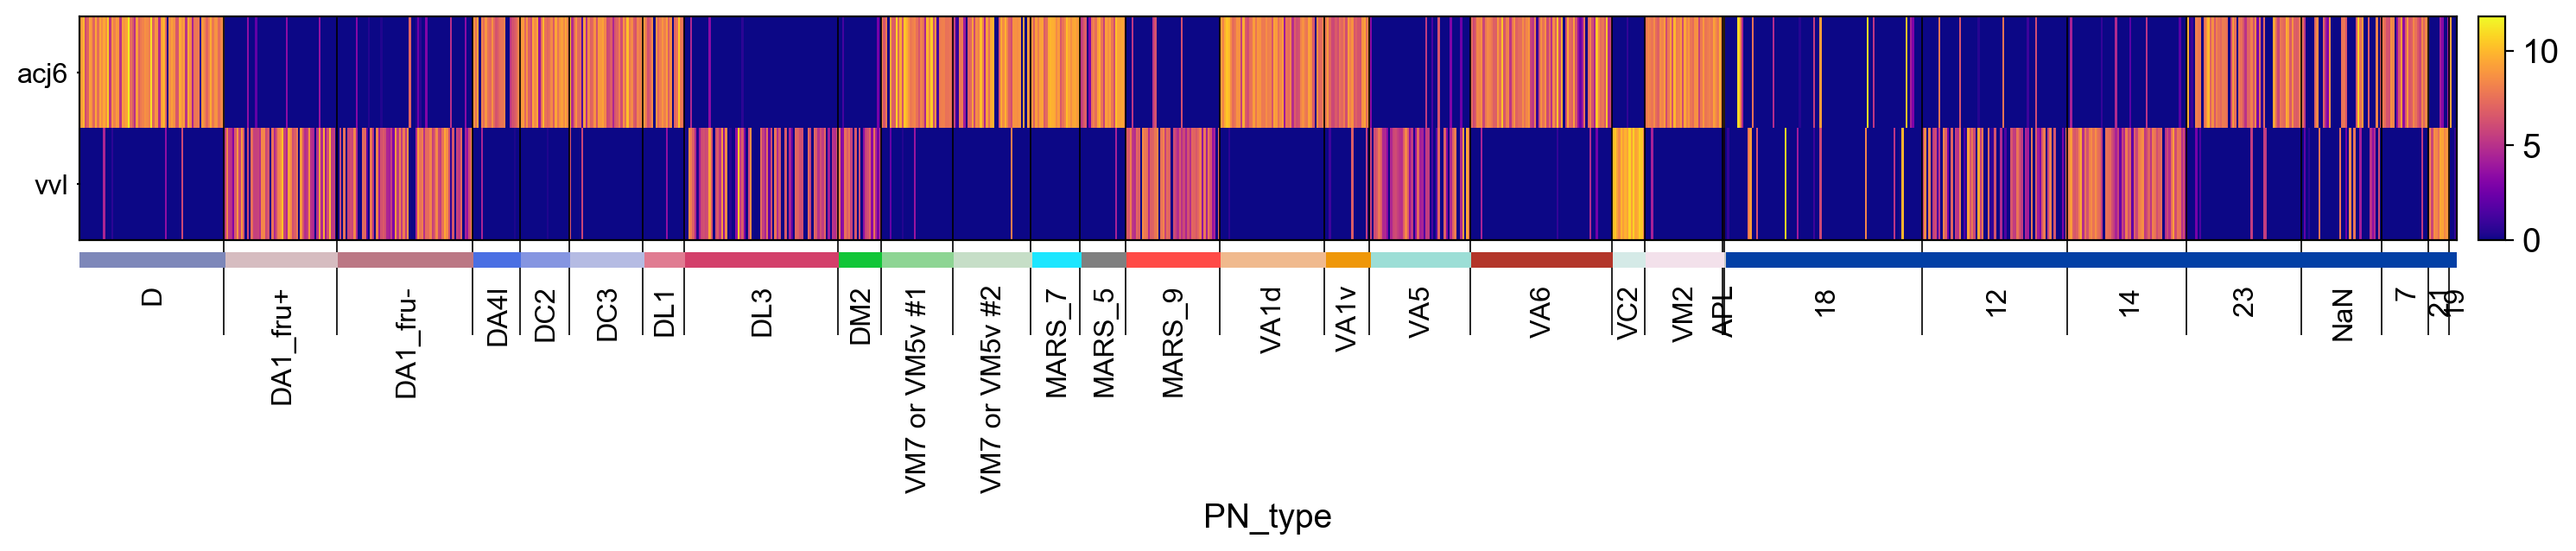

GridSpec(3, 3, height_ratios=[0, 1.87, 0.13], width_ratios=[18, 0, 0.2])

In [9]:
sc.pl.heatmap(adata_0h, var_names=['acj6','vvl'], groupby='PN_type', swap_axes=True,
              figsize=(18,2), cmap="plasma")

In [10]:
adPN_type = ['D','DA4l','DC2','DC3','DL1','VM7 or VM5v #1','VM7 or VM5v #2','MARS_7','MARS_5',
             'VA1d','VA1v','VA6','VM2','23','7',]
lPN_type = ['DA1_fru+','DA1_fru-','DL3','DM2','MARS_9','VA5','VC2','12','14','21']

In [11]:
adPN_ordered = ['DA4l','VA6','VA2','DL1','DC2','D','DC3','VA1d','VM7 or VM5v #1','VM2','DM6','VA1v','VM7 or VM5v #2']
lPN_ordered = ['VC2','DM2','VA5','DA1_fru+','DL3','DA1_fru-']

# Plot the correlation matrix of 0h adPN and lPN

In [12]:
adata_adPN_lPN = adata_0h[adata_0h.obs['PN_type'].isin(adPN_type+lPN_type)]
adata_adPN_lPN

View of AnnData object with n_obs × n_vars = 1019 × 17474 
    obs: 'batch', 'genotype', 'stage', 'n_counts', 'n_genes', 'PN_type', 'MARS', 'HDBSCAN', 'MARS_2way_matched', 'MARS_2way_matched_PN_type', 'lineage', '24h_HDBSCAN', 'matched_type_with_stage', 'mannually_matched'
    var: 'highly_variable'
    uns: '24h_HDBSCAN_colors', 'HDBSCAN_colors', 'MARS_2way_matched_PN_type_colors', 'MARS_2way_matched_colors', 'MARS_colors', 'mannually_matched_colors', 'stage_colors'
    obsm: 'X_tsne'

computing PCA with n_comps = 50
    finished (0:00:01)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_PN_type']`


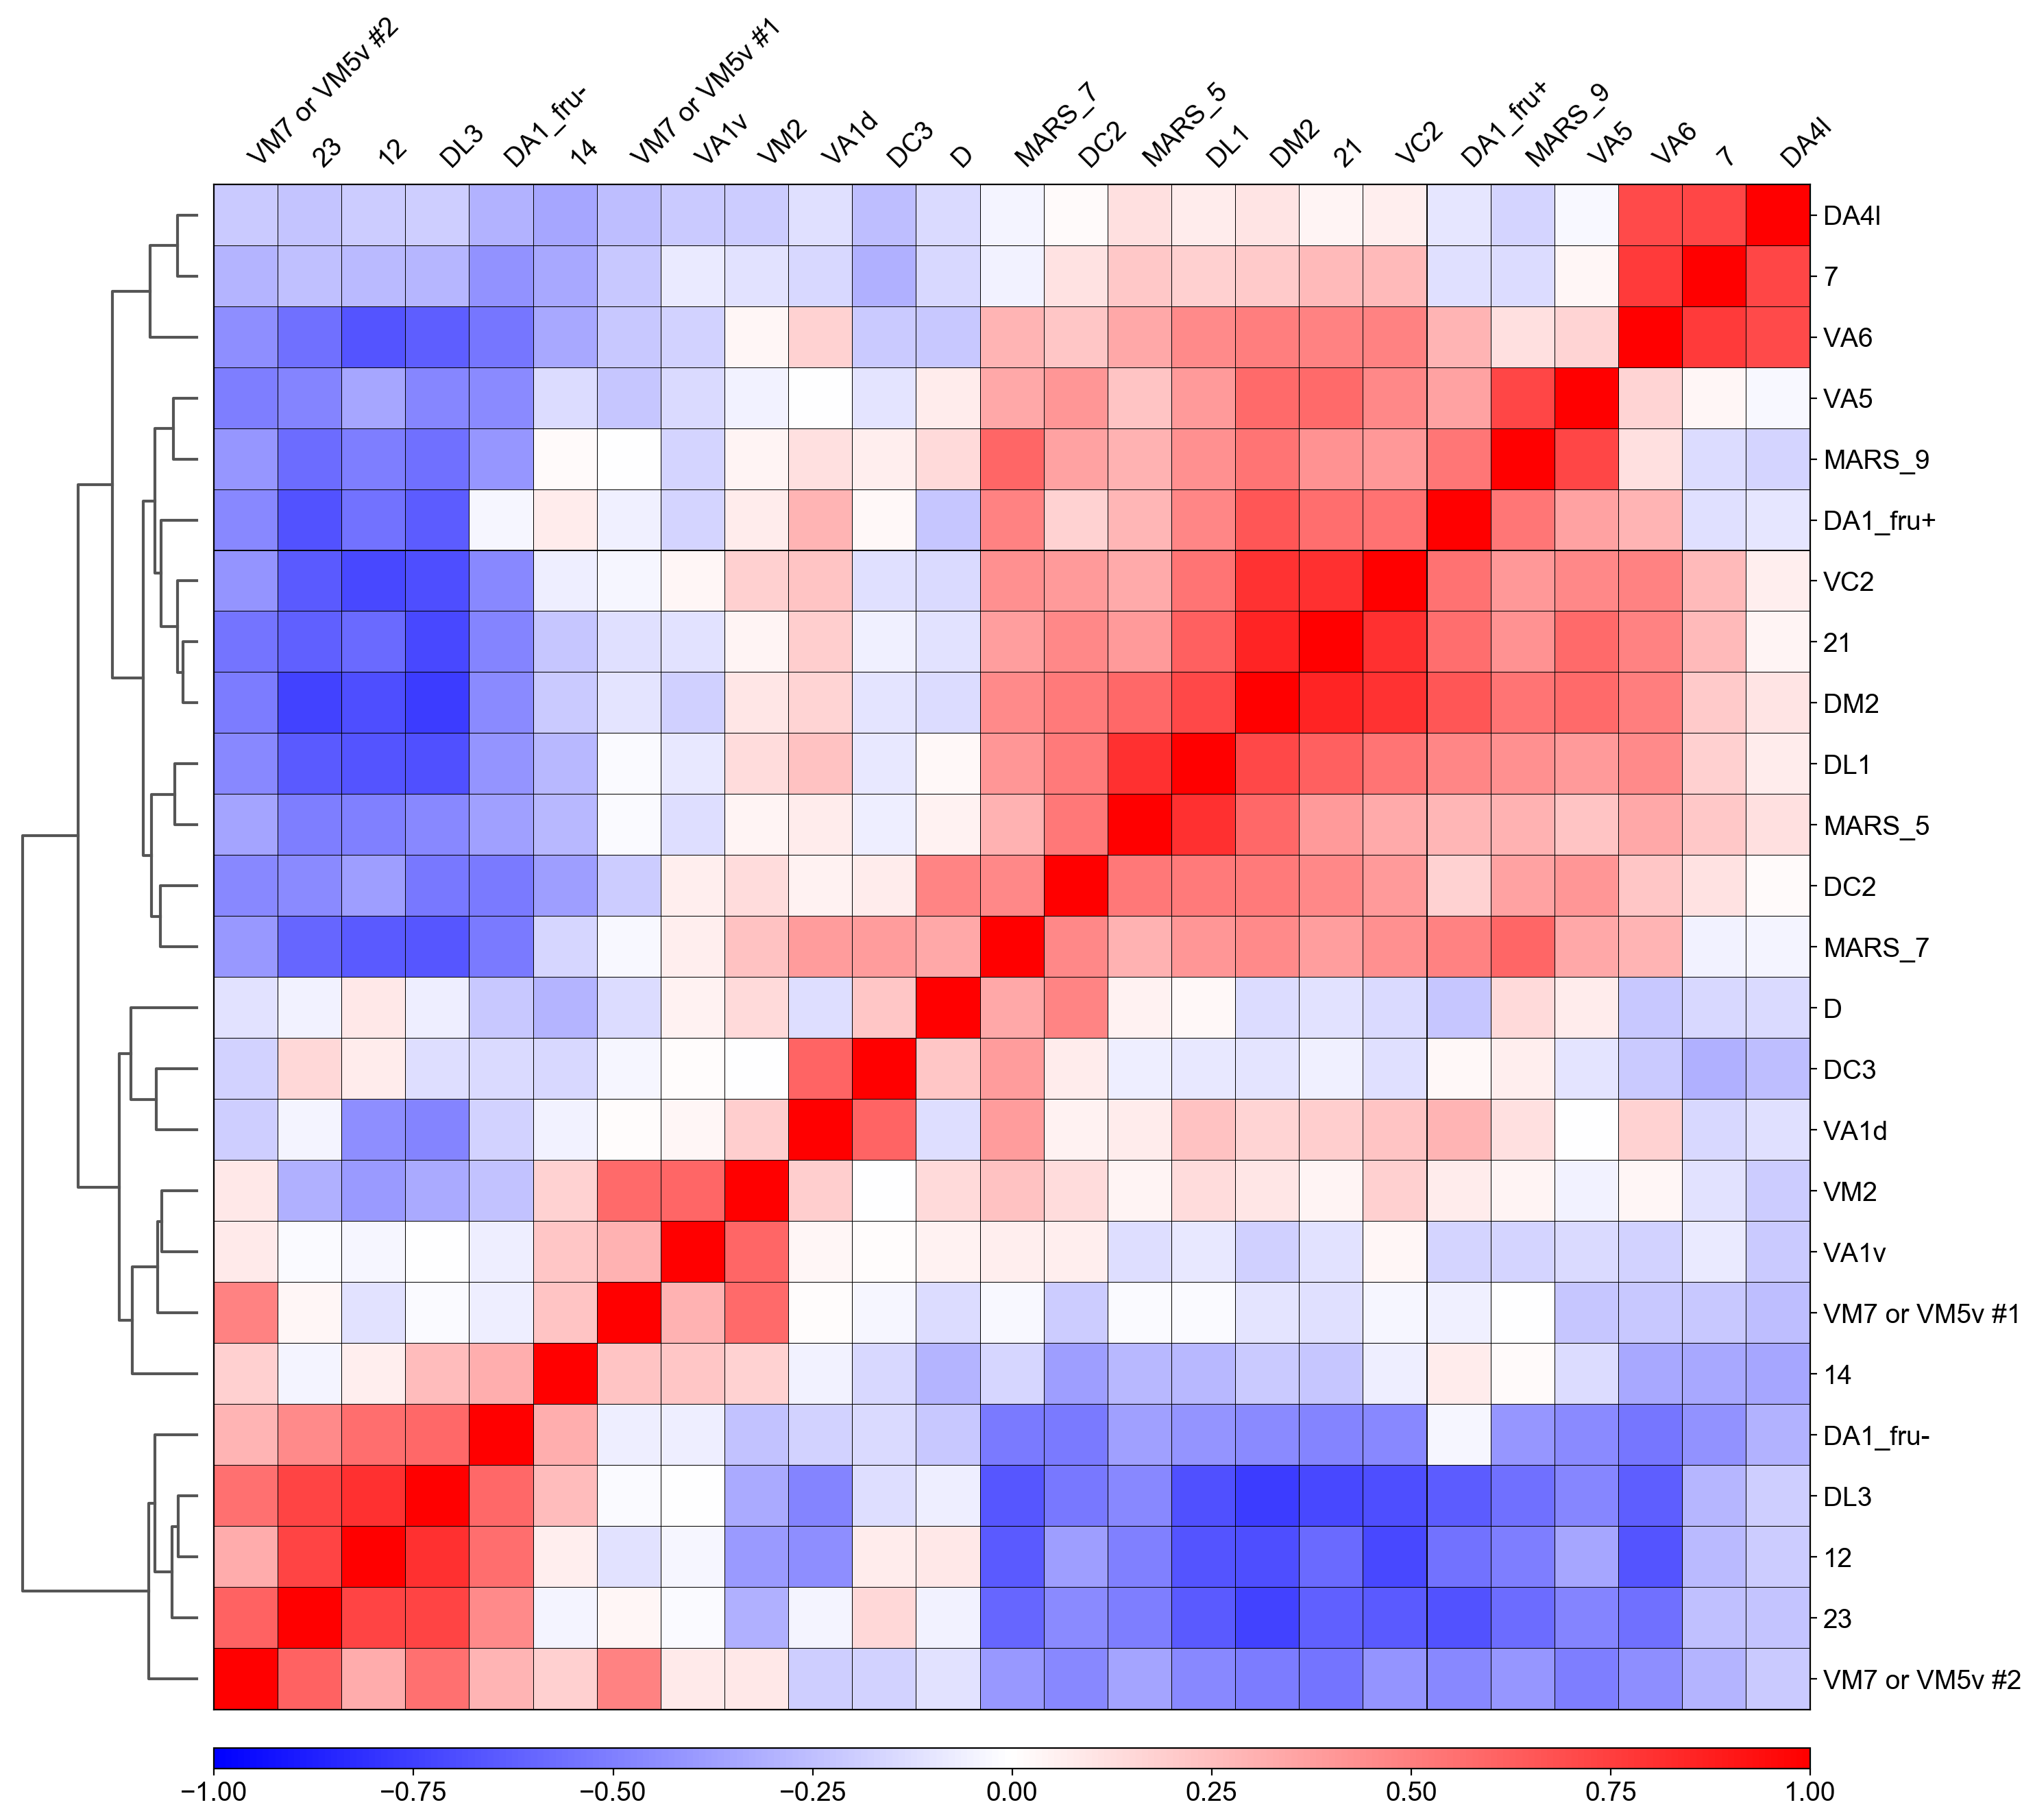

In [13]:
sc.tl.pca(adata_adPN_lPN, svd_solver='arpack', use_highly_variable=False, random_state=1)
sc.tl.dendrogram(adata_adPN_lPN, groupby='PN_type',optimal_ordering=True)
sc.pl.correlation_matrix(adata_adPN_lPN,'PN_type')#, save='_0h_adPN_lPN_pca.pdf')

# only ordered adPNs

In [14]:
adPN_ordered = ['DA4l','VA6','VA2','DL1','DC2','D','DC3','VA1d','VM7 or VM5v #1','VM2','DM6','VA1v','VM7 or VM5v #2']
adata_adPN_ordered = adata_0h[adata_0h.obs['PN_type'].isin(adPN_ordered)]
adata_adPN_ordered

View of AnnData object with n_obs × n_vars = 427 × 17474 
    obs: 'batch', 'genotype', 'stage', 'n_counts', 'n_genes', 'PN_type', 'MARS', 'HDBSCAN', 'MARS_2way_matched', 'MARS_2way_matched_PN_type', 'lineage', '24h_HDBSCAN', 'matched_type_with_stage', 'mannually_matched'
    var: 'highly_variable'
    uns: '24h_HDBSCAN_colors', 'HDBSCAN_colors', 'MARS_2way_matched_PN_type_colors', 'MARS_2way_matched_colors', 'MARS_colors', 'mannually_matched_colors', 'stage_colors'
    obsm: 'X_tsne'

In [15]:
sc.tl.pca(adata_adPN_ordered, svd_solver='arpack', use_highly_variable=False, random_state=1)
sc.tl.dendrogram(adata_adPN_ordered, groupby='PN_type',optimal_ordering=True)

computing PCA with n_comps = 50
    finished (0:00:00)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_PN_type']`


In [16]:
index = pd.Series(adata_adPN_ordered.obs.PN_type.cat.categories)
adPN_corr = pd.DataFrame(adata_adPN_ordered.uns['dendrogram_PN_type']['correlation_matrix'], index=index, columns=index)

In [17]:
adata_adPN_ordered.uns['dendrogram_PN_type']['categories_idx_ordered']

[7, 3, 0, 8, 10, 5, 6, 2, 4, 9, 1]

In [18]:
pd.Series(adata_adPN_ordered.obs.PN_type.cat.categories)

0                  D
1               DA4l
2                DC2
3                DC3
4                DL1
5     VM7 or VM5v #1
6     VM7 or VM5v #2
7               VA1d
8               VA1v
9                VA6
10               VM2
dtype: object

In [19]:
print(adPN_ordered)

['DA4l', 'VA6', 'VA2', 'DL1', 'DC2', 'D', 'DC3', 'VA1d', 'VM7 or VM5v #1', 'VM2', 'DM6', 'VA1v', 'VM7 or VM5v #2']


In [20]:
adata_adPN_ordered.uns['dendrogram_PN_type']['categories_idx_ordered'] = [1,9,4,2,0,3,7,5,10,8,6]

note that here the dendrogram is no longer correct because we have switched the order of things, but the correlation matrix is still right

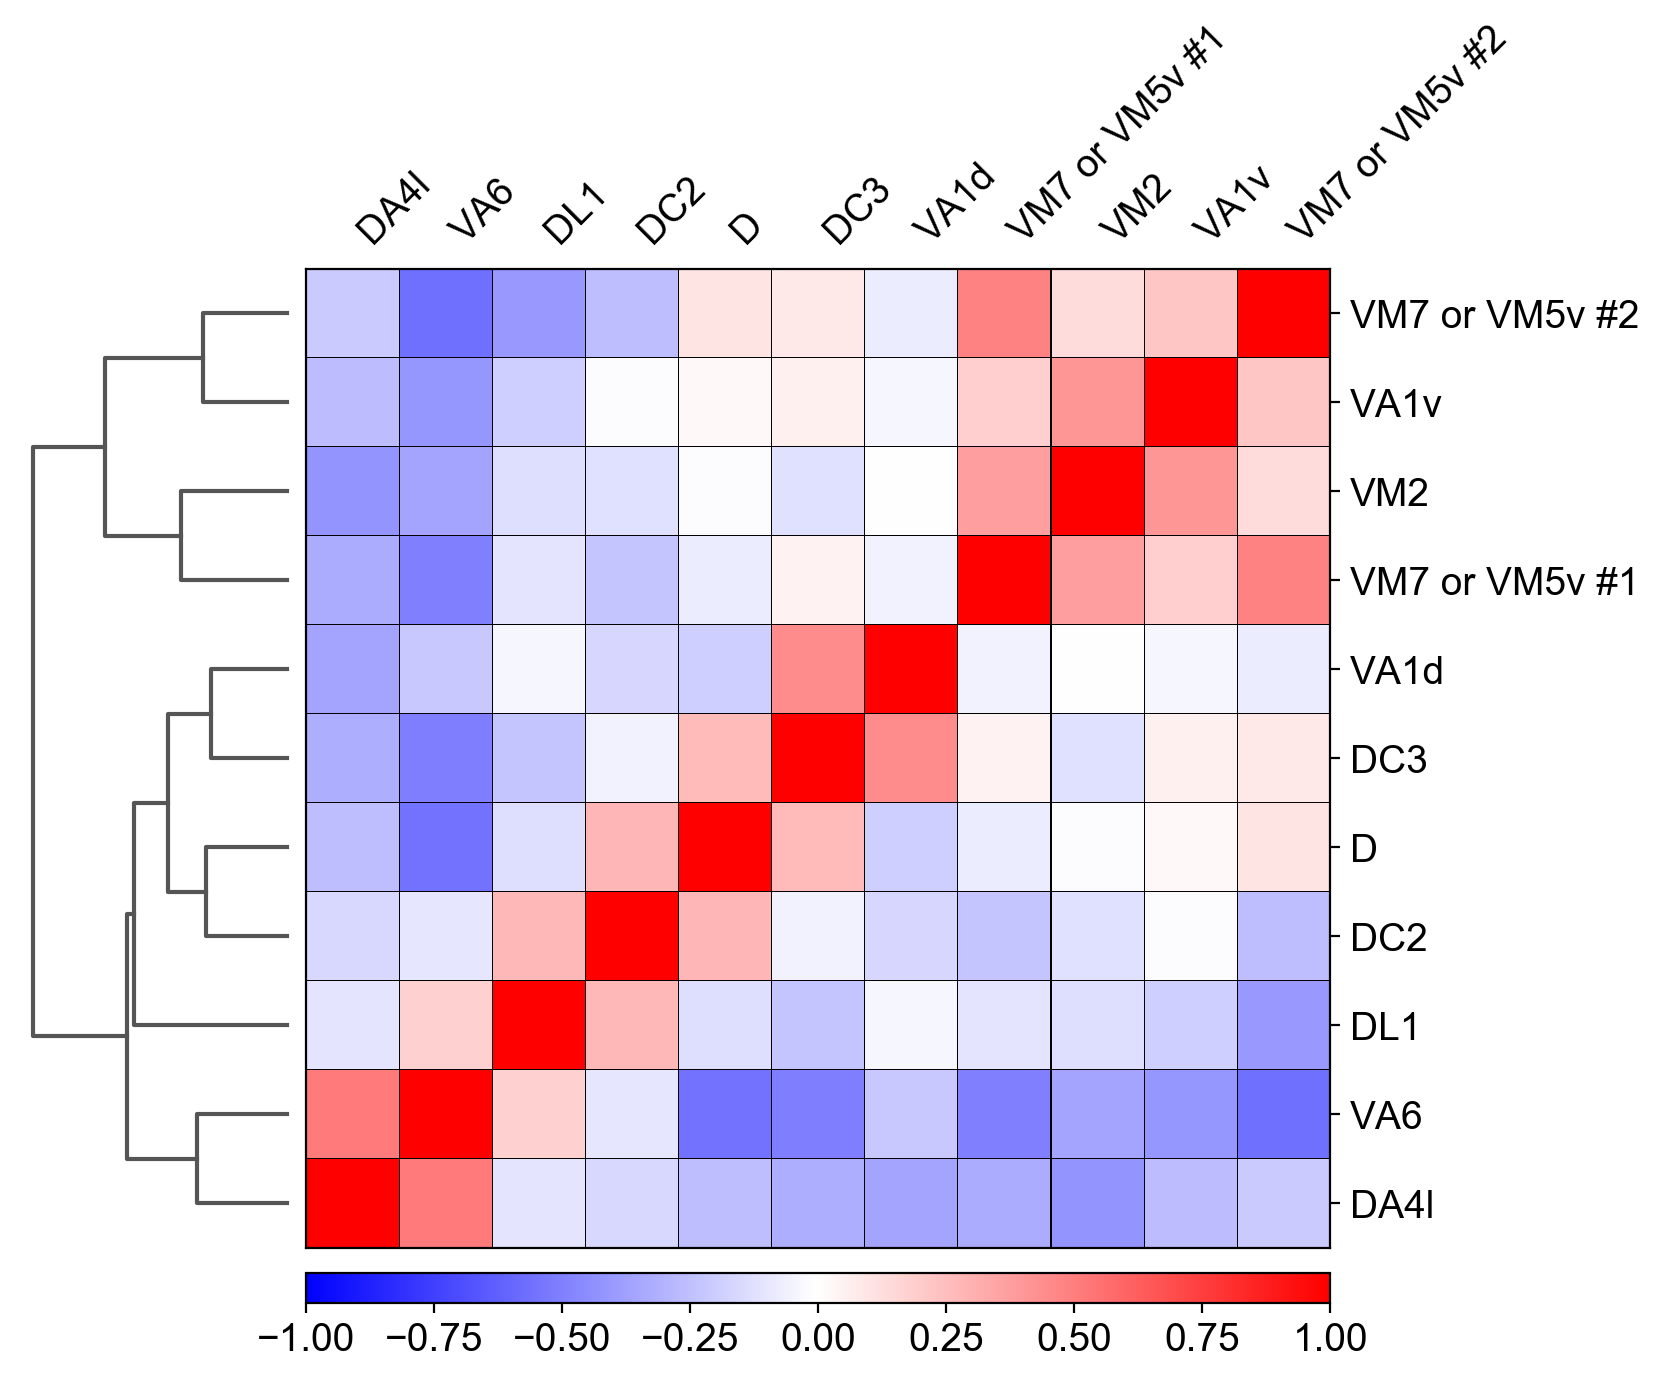

In [21]:
sc.pl.correlation_matrix(adata_adPN_ordered,'PN_type')#, save='_0h_adPN_pca.pdf')

# only ordered lPNs

In [22]:
adata_lPN_ordered = adata_0h[adata_0h.obs['PN_type'].isin(lPN_ordered)]
adata_lPN_ordered

View of AnnData object with n_obs × n_vars = 282 × 17474 
    obs: 'batch', 'genotype', 'stage', 'n_counts', 'n_genes', 'PN_type', 'MARS', 'HDBSCAN', 'MARS_2way_matched', 'MARS_2way_matched_PN_type', 'lineage', '24h_HDBSCAN', 'matched_type_with_stage', 'mannually_matched'
    var: 'highly_variable'
    uns: '24h_HDBSCAN_colors', 'HDBSCAN_colors', 'MARS_2way_matched_PN_type_colors', 'MARS_2way_matched_colors', 'MARS_colors', 'mannually_matched_colors', 'stage_colors'
    obsm: 'X_tsne'

In [23]:
# sc.pp.highly_variable_genes(adata_lPN_ordered, n_top_genes=500)
sc.tl.pca(adata_lPN_ordered, svd_solver='arpack', use_highly_variable=False, random_state=1)
sc.tl.dendrogram(adata_lPN_ordered, groupby='PN_type',optimal_ordering=True)

computing PCA with n_comps = 50
    finished (0:00:00)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_PN_type']`


In [24]:
index = pd.Series(adata_lPN_ordered.obs.PN_type.cat.categories)
lPN_corr = pd.DataFrame(adata_lPN_ordered.uns['dendrogram_PN_type']['correlation_matrix'], index=index, columns=index)

In [25]:
adata_lPN_ordered.uns['dendrogram_PN_type']['categories_idx_ordered']

[4, 3, 5, 0, 1, 2]

In [27]:
print(lPN_ordered)

['VC2', 'DM2', 'VA5', 'DA1_fru+', 'DL3', 'DA1_fru-']


In [28]:
adata_lPN_ordered.uns['dendrogram_PN_type']['categories_idx_ordered'] = [5,3,4,0,2,1]

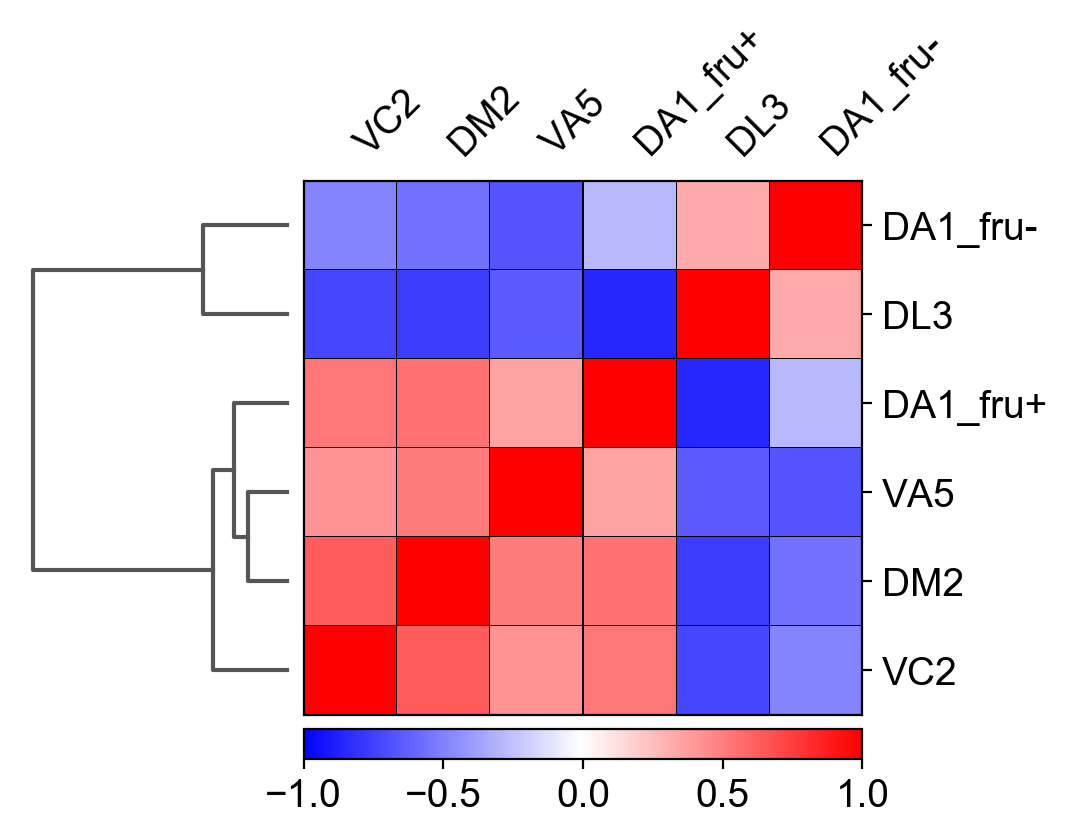

In [29]:
sc.pl.correlation_matrix(adata_lPN_ordered,'PN_type')

# plot Liu et al. 2015 Science paper Fig S2 genes

In [30]:
adPN_ordered = ['DA4l','VA6','VA2','DL1','DC2','D','DC3','VA1d','VM7 or VM5v #1','VM2','DM6','VA1v','VM7 or VM5v #2']
adata_adPN_ordered = adata_0h[adata_0h.obs['PN_type'].isin(adPN_ordered)]
adata_adPN_ordered

View of AnnData object with n_obs × n_vars = 427 × 17474 
    obs: 'batch', 'genotype', 'stage', 'n_counts', 'n_genes', 'PN_type', 'MARS', 'HDBSCAN', 'MARS_2way_matched', 'MARS_2way_matched_PN_type', 'lineage', '24h_HDBSCAN', 'matched_type_with_stage', 'mannually_matched'
    var: 'highly_variable'
    uns: '24h_HDBSCAN_colors', 'HDBSCAN_colors', 'MARS_2way_matched_PN_type_colors', 'MARS_2way_matched_colors', 'MARS_colors', 'mannually_matched_colors', 'stage_colors'
    obsm: 'X_tsne'

In [31]:
reordered = ['DA4l','VA6','DL1','DC2','D','DC3','VA1d','VM7 or VM5v #1','VM2', 'VA1v', 'VM7 or VM5v #2']
adata_adPN_ordered.obs.PN_type.cat.reorder_categories(reordered, inplace=True)

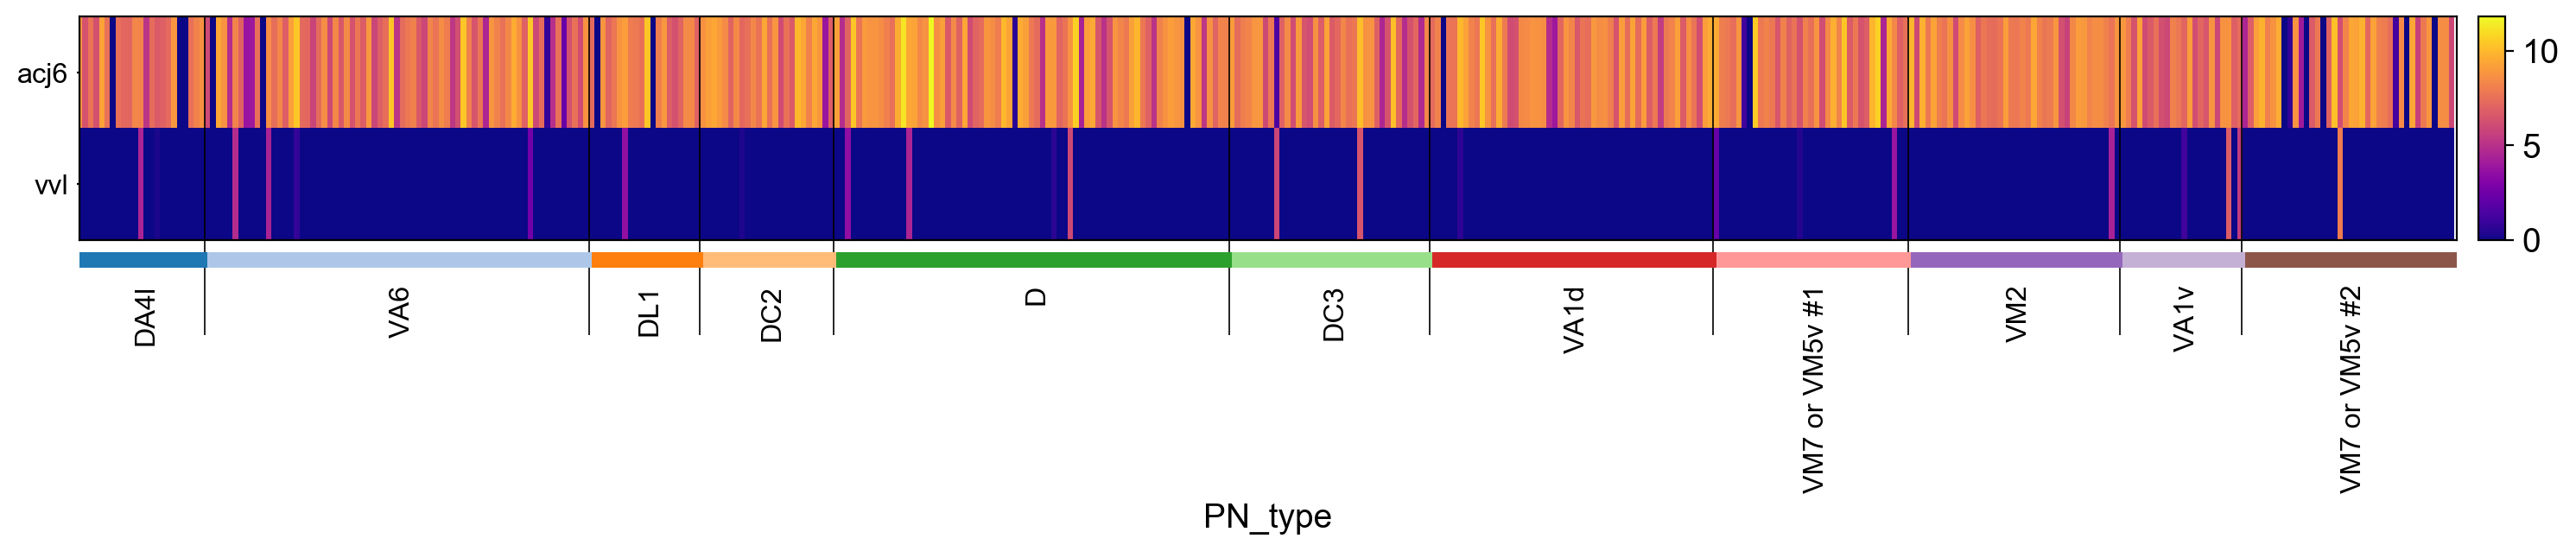

GridSpec(3, 3, height_ratios=[0, 1.87, 0.13], width_ratios=[18, 0, 0.2])

In [32]:
sc.pl.heatmap(adata_adPN_ordered,var_names=['acj6','vvl'], groupby='PN_type', swap_axes=True,
              figsize=(18,2), cmap="plasma")

In [33]:
genes = ['so','CG32036','Kr','comm2','Orct2','GstD3','GstE1','CG43066','nrm','CG1827','sca','Imp','lin-28',
         'cas','E23','Chd64','CR31386','sip1','CG10512','plum','CG3776','CG5953','Oatp74D','CG15293',
         'brk','mas','hkb','CG32625','Stat92E','Dr','br','GlyS','CG31769','Gr63a','noe','betaTub60D',
         'Vdup1','Toll-7','Taf12L','Syp','Mpc1','Drice','vir','Glycogenin','CG30383','Drat','CG15628','Ald',
         'CG4042','CG33494','Eip93F','CG32039','Hsp67Ba','Tret1-1','hng3','CG2931','lft','CG11882','CG15646',
         'sprt','pncr002:3R','CG8520','Gbs-70E','CG9993','CR43461']

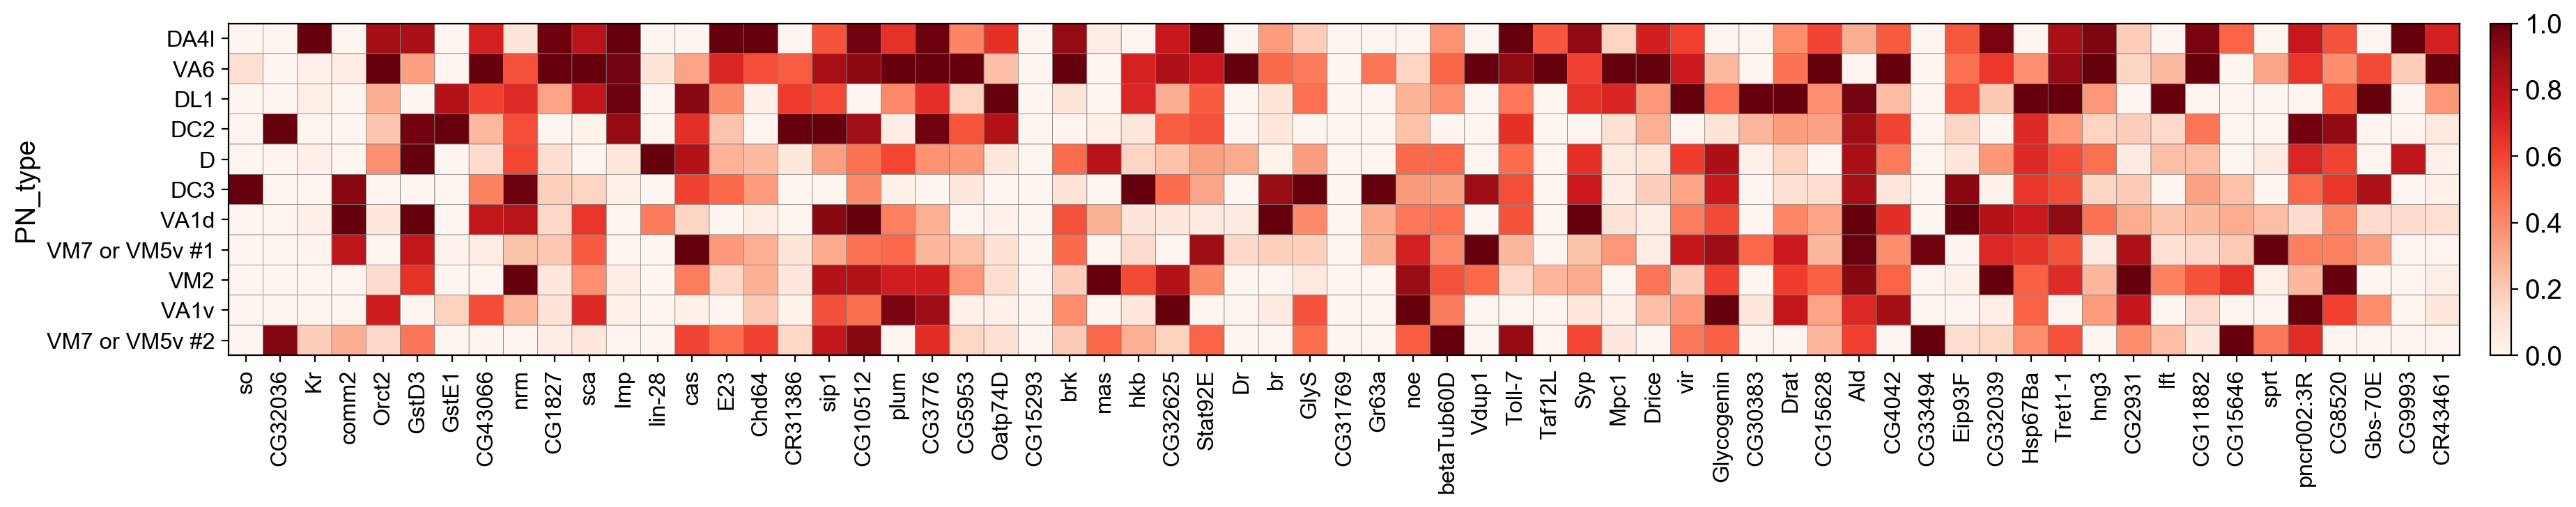

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[20.8, 0, 0.2])

In [34]:
sc.pl.matrixplot(adata_adPN_ordered, var_names=genes, groupby='PN_type', standard_scale='var',
                 swap_axes=False, cmap='Reds')

In [35]:
# plot only genes with trend correlated to their birth order
trend_genes = ['Orct2','CG1827','sca','Imp','GstE1','GstD3','lin-28','GlyS','br',
               'Eip93F','noe','CG32039','CG2931','pncr002:3R','CG15646']

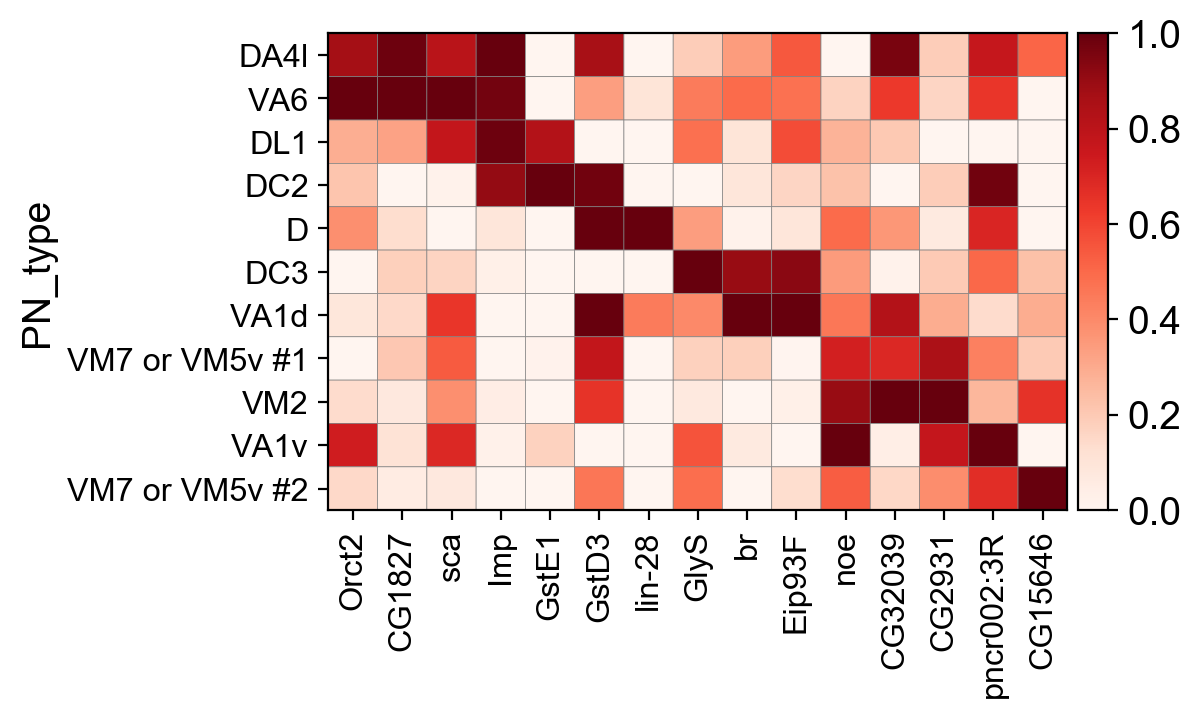

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[4.8, 0, 0.2])

In [36]:
sc.pl.matrixplot(adata_adPN_ordered, var_names=trend_genes, groupby='PN_type', standard_scale='var',
                 swap_axes=False, cmap='Reds')

# Permutation test

In [37]:
# import all correlation matrix from all stages
corr_0h = pd.read_csv('../data/correlation_matrix/0h_decoded_adPN_pca.csv', index_col=0)
corr_24h = pd.read_csv('../data/correlation_matrix/24h_decoded_adPN_pca.csv', index_col=0)
corr_48h = pd.read_csv('../data/correlation_matrix/48h_decoded_adPN_pca.csv', index_col=0)
corr_adult = pd.read_csv('../data/correlation_matrix/adult_decoded_adPN_pca.csv', index_col=0)

In [38]:
# for adult, because VA1d and DC3 PNs merge into 1 inseperatable cluster, we will duplicate this column
corr_adult = corr_adult.rename(columns={"['VA1d', 'DC3']": "VA1d"}, index={"['VA1d', 'DC3']": "VA1d"})
DC3 = corr_adult['VA1d'].append(pd.Series([1],index=['DC3']))
corr_adult['DC3'] = DC3
corr_adult = corr_adult.append(DC3, ignore_index=True)
corr_adult = corr_adult.set_index(DC3.index)

Keep adPN types that are decoded in all 4 stages

In [39]:
ordered = ['VA6','DL1','DC3','VA1d','VM7 or VM5v #1','VM2','VA1v','VM7 or VM5v #2']
corr_0h_selected = corr_0h[ordered].loc[ordered]
corr_24h_selected = corr_24h[ordered].loc[ordered]
corr_48h_selected = corr_48h[ordered].loc[ordered]
corr_adult_selected = corr_adult[ordered].loc[ordered]

In [40]:
num_types = 5

In [41]:
from scipy import stats

In [42]:
rank_corr_0h = pd.DataFrame(columns=['correlation','p-value'])
curr_num = 8
total = 8
for PN_type in corr_0h_selected.index:
    if curr_num > num_types:
        corr_order = pd.Series(np.arange(curr_num-1), index=corr_0h_selected[PN_type][total+1-curr_num:].sort_values(ascending=False).index)
        corr, pvalue = stats.spearmanr(corr_order[ordered][total+1-curr_num:].astype(int),np.arange(curr_num-1))
        rank_corr_0h.loc[PN_type] = pd.Series({'correlation':corr, 'p-value':pvalue})
    elif curr_num < total-num_types+1:
        corr_order = pd.Series(np.arange(total-curr_num), index=corr_0h_selected[PN_type][:total-curr_num].sort_values(ascending=False).index)
        corr, pvalue = stats.spearmanr(corr_order[ordered][:total-curr_num].astype(int),np.arange(total-1-curr_num,-1,-1))
        rank_corr_0h.loc[PN_type] = pd.Series({'correlation':corr, 'p-value':pvalue})
    curr_num = curr_num - 1

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1155: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [43]:
rank_corr_24h = pd.DataFrame(columns=['correlation','p-value'])
curr_num = 8
total = 8
for PN_type in corr_24h_selected.index:
    if curr_num > num_types:
        corr_order = pd.Series(np.arange(curr_num-1), index=corr_24h_selected[PN_type][total+1-curr_num:].sort_values(ascending=False).index)
        corr, pvalue = stats.spearmanr(corr_order[ordered][total+1-curr_num:].astype(int),np.arange(curr_num-1))
        rank_corr_24h.loc[PN_type] = pd.Series({'correlation':corr, 'p-value':pvalue})
    elif curr_num < total-num_types+1:
        corr_order = pd.Series(np.arange(total-curr_num), index=corr_24h_selected[PN_type][:total-curr_num].sort_values(ascending=False).index)
        corr, pvalue = stats.spearmanr(corr_order[ordered][:total-curr_num].astype(int),np.arange(total-1-curr_num,-1,-1))
        rank_corr_24h.loc[PN_type] = pd.Series({'correlation':corr, 'p-value':pvalue})
    curr_num = curr_num - 1

In [44]:
rank_corr_48h = pd.DataFrame(columns=['correlation','p-value'])
curr_num = 8
total = 8
for PN_type in corr_48h_selected.index:
    if curr_num > num_types:
        corr_order = pd.Series(np.arange(curr_num-1), index=corr_48h_selected[PN_type][total+1-curr_num:].sort_values(ascending=False).index)
        corr, pvalue = stats.spearmanr(corr_order[ordered][total+1-curr_num:].astype(int),np.arange(curr_num-1))
        rank_corr_48h.loc[PN_type] = pd.Series({'correlation':corr, 'p-value':pvalue})
    elif curr_num < total-num_types+1:
        corr_order = pd.Series(np.arange(total-curr_num), index=corr_48h_selected[PN_type][:total-curr_num].sort_values(ascending=False).index)
        corr, pvalue = stats.spearmanr(corr_order[ordered][:total-curr_num].astype(int),np.arange(total-1-curr_num,-1,-1))
        rank_corr_48h.loc[PN_type] = pd.Series({'correlation':corr, 'p-value':pvalue})
    curr_num = curr_num - 1

In [45]:
rank_corr_adult = pd.DataFrame(columns=['correlation','p-value'])
curr_num = 8
total = 8
for PN_type in corr_adult_selected.index:
    if curr_num > num_types:
        corr_order = pd.Series(np.arange(curr_num-1), index=corr_adult_selected[PN_type][total+1-curr_num:].sort_values(ascending=False).index)
        corr, pvalue = stats.spearmanr(corr_order[ordered][total+1-curr_num:].astype(int),np.arange(curr_num-1))
        rank_corr_adult.loc[PN_type] = pd.Series({'correlation':corr, 'p-value':pvalue})
    elif curr_num < total-num_types+1:
        corr_order = pd.Series(np.arange(total-curr_num), index=corr_adult_selected[PN_type][:total-curr_num].sort_values(ascending=False).index)
        corr, pvalue = stats.spearmanr(corr_order[ordered][:total-curr_num].astype(int),np.arange(total-1-curr_num,-1,-1))
        rank_corr_adult.loc[PN_type] = pd.Series({'correlation':corr, 'p-value':pvalue})
    curr_num = curr_num - 1

In [46]:
all_obs_corr = pd.DataFrame([rank_corr_0h.correlation.values,rank_corr_24h.correlation.values,
                         rank_corr_48h.correlation.values,rank_corr_adult.correlation.values]).T
all_obs_corr.columns = ['0h','24h','48h','adult']
obs_summary = all_obs_corr.describe()
obs_summary

,0h,24h,48h,adult
count,6.000000,6.000000,6.000000,6.000000
mean,0.644048,0.469048,0.197619,0.134524
std,0.350871,0.400247,0.774579,0.145995
min,0.100000,-0.257143,-0.900000,-0.028571
25%,0.455357,0.375000,-0.392857,0.075000
50%,0.696429,0.600000,0.575000,0.092857
75%,0.921429,0.685714,0.766071,0.158929
max,1.000000,0.857143,0.821429,0.400000


premutation test

In [47]:
import random

In [48]:
# 0h
correlation_stim_0h = np.array([])
total = 8
for i in range (5000):
    curr_num = 8
    curr_corr = np.array([])
    # generate a scrambled birth order and re-order corr-matrix based on that
    order_scrambled = ordered[:]
    random.shuffle(order_scrambled)
    corr_0h_selected = corr_0h[order_scrambled].loc[order_scrambled]
    # iterate through all columns to get all correlations
    for PN_type in corr_0h_selected.index:
        if curr_num > num_types:
            corr_order = pd.Series(np.arange(curr_num-1), index=corr_0h_selected[PN_type][total+1-curr_num:].sort_values(ascending=False).index)
            corr, pvalue = stats.spearmanr(corr_order[order_scrambled][total+1-curr_num:].astype(int),np.arange(curr_num-1))
            curr_corr = np.append(curr_corr,corr)
        elif curr_num < total-num_types+1:
            corr_order = pd.Series(np.arange(total-curr_num), index=corr_0h_selected[PN_type][:total-curr_num].sort_values(ascending=False).index)
            corr, pvalue = stats.spearmanr(corr_order[order_scrambled][:total-curr_num].astype(int),np.arange(total-1-curr_num,-1,-1))
            curr_corr = np.append(curr_corr,corr)
        curr_num = curr_num - 1
    correlation_stim_0h = np.append(correlation_stim_0h,(sum(curr_corr) / len(curr_corr)))

In [49]:
print('observed similarity: :', obs_summary['0h']['mean'])
print('p-value:',
     (obs_summary['0h']['mean'] < correlation_stim_0h).sum() / len(correlation_stim_0h))

observed similarity: : 0.6440476190476191
p-value: 0.0064


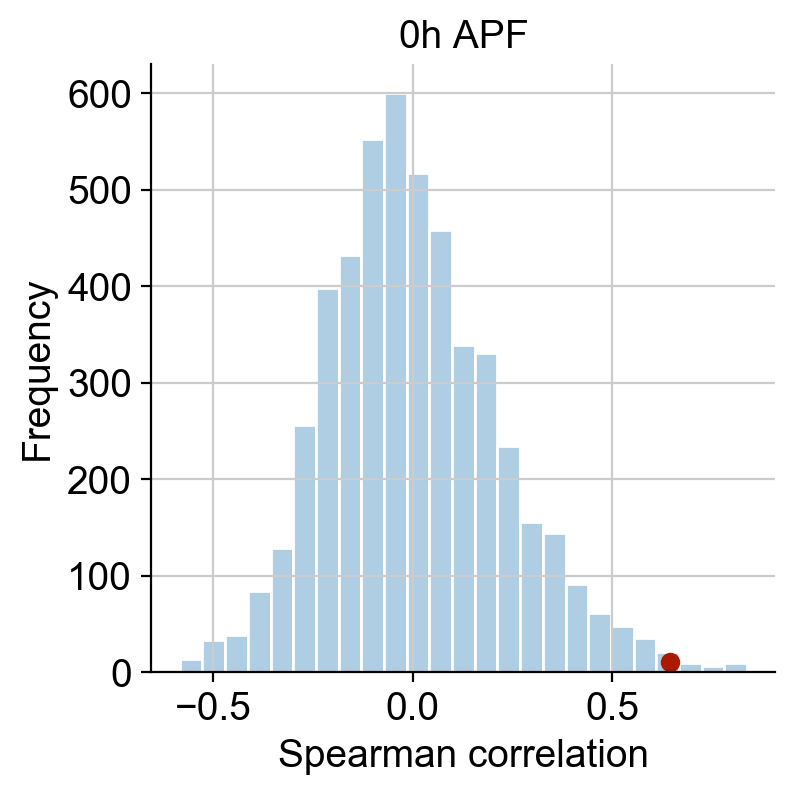

In [50]:
fig, ax = plt.subplots()
ax.scatter(obs_summary['0h']['mean'], 11, c='#ab1a00', zorder=2)
ax.hist(correlation_stim_0h, bins=25, color='#afcde3', edgecolor='white', linewidth=1, zorder=1)
ax.set_ylabel('Frequency')
ax.set_xlabel('Spearman correlation')
ax.set_title('0h APF')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [51]:
# 24h
correlation_stim_24h = np.array([])
total = 8
for i in range (5000):
    curr_num = 8
    curr_corr = np.array([])
    # generate a scrambled birth order and re-order corr-matrix based on that
    order_scrambled = ordered[:]
    random.shuffle(order_scrambled)
    corr_24h_selected = corr_24h[order_scrambled].loc[order_scrambled]
    # iterate through all columns to get all correlations
    for PN_type in corr_24h_selected.index:
        if curr_num > num_types:
            corr_order = pd.Series(np.arange(curr_num-1), index=corr_24h_selected[PN_type][total+1-curr_num:].sort_values(ascending=False).index)
            corr, pvalue = stats.spearmanr(corr_order[order_scrambled][total+1-curr_num:].astype(int),np.arange(curr_num-1))
            curr_corr = np.append(curr_corr,corr)
        elif curr_num < total-num_types+1:
            corr_order = pd.Series(np.arange(total-curr_num), index=corr_24h_selected[PN_type][:total-curr_num].sort_values(ascending=False).index)
            corr, pvalue = stats.spearmanr(corr_order[order_scrambled][:total-curr_num].astype(int),np.arange(total-1-curr_num,-1,-1))
            curr_corr = np.append(curr_corr,corr)
        curr_num = curr_num - 1
    correlation_stim_24h = np.append(correlation_stim_24h,(sum(curr_corr) / len(curr_corr)))

In [52]:
print('observed similarity: :', obs_summary['24h']['mean'])
print('p-value:',
     (obs_summary['24h']['mean'] < correlation_stim_24h).sum() / len(correlation_stim_24h))

observed similarity: : 0.4690476190476191
p-value: 0.0278


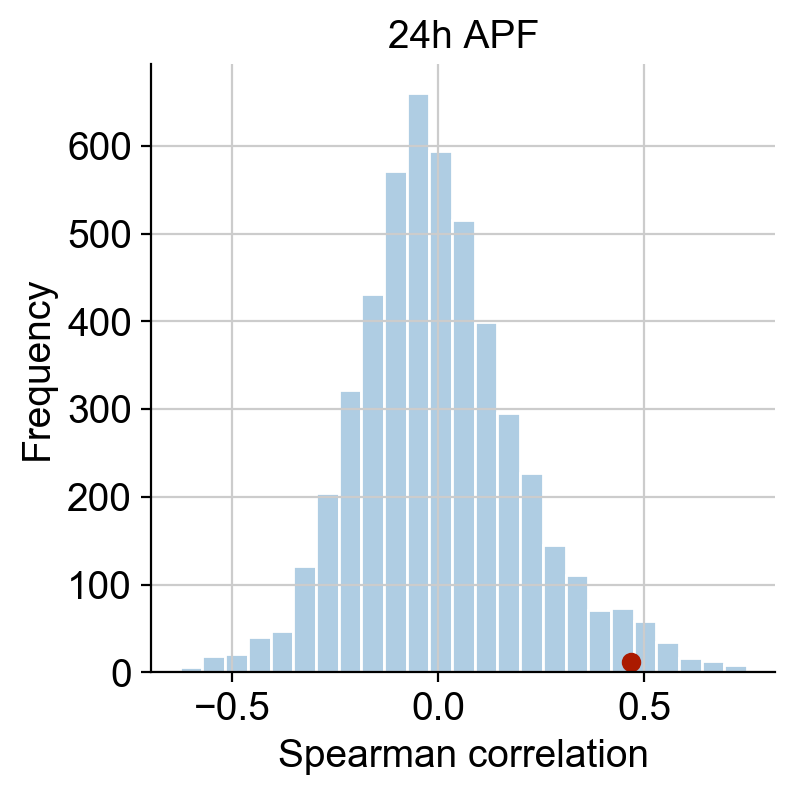

In [53]:
fig, ax = plt.subplots()
ax.scatter(obs_summary['24h']['mean'], 12, c='#ab1a00', zorder=2)
ax.hist(correlation_stim_24h, bins=25, color='#afcde3', edgecolor='white', linewidth=1, zorder=1)
ax.set_ylabel('Frequency')
ax.set_xlabel('Spearman correlation')
ax.set_title('24h APF')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plt.savefig('figures/figure_9/permuation/24h_APF.pdf', bbox_inches='tight')

In [54]:
# 48h
correlation_stim_48h = np.array([])
total = 8
for i in range (5000):
    curr_num = 8
    curr_corr = np.array([])
    # generate a scrambled birth order and re-order corr-matrix based on that
    order_scrambled = ordered[:]
    random.shuffle(order_scrambled)
    corr_48h_selected = corr_48h[order_scrambled].loc[order_scrambled]
    # iterate through all columns to get all correlations
    for PN_type in corr_48h_selected.index:
        if curr_num > num_types:
            corr_order = pd.Series(np.arange(curr_num-1), index=corr_48h_selected[PN_type][total+1-curr_num:].sort_values(ascending=False).index)
            corr, pvalue = stats.spearmanr(corr_order[order_scrambled][total+1-curr_num:].astype(int),np.arange(curr_num-1))
            curr_corr = np.append(curr_corr,corr)
        elif curr_num < total-num_types+1:
            corr_order = pd.Series(np.arange(total-curr_num), index=corr_48h_selected[PN_type][:total-curr_num].sort_values(ascending=False).index)
            corr, pvalue = stats.spearmanr(corr_order[order_scrambled][:total-curr_num].astype(int),np.arange(total-1-curr_num,-1,-1))
            curr_corr = np.append(curr_corr,corr)
        curr_num = curr_num - 1
    correlation_stim_48h = np.append(correlation_stim_48h,(sum(curr_corr) / len(curr_corr)))

In [55]:
print('observed similarity: :', obs_summary['48h']['mean'])
print('p-value:',
     (obs_summary['48h']['mean'] < correlation_stim_48h).sum() / len(correlation_stim_48h))

observed similarity: : 0.19761904761904767
p-value: 0.1856


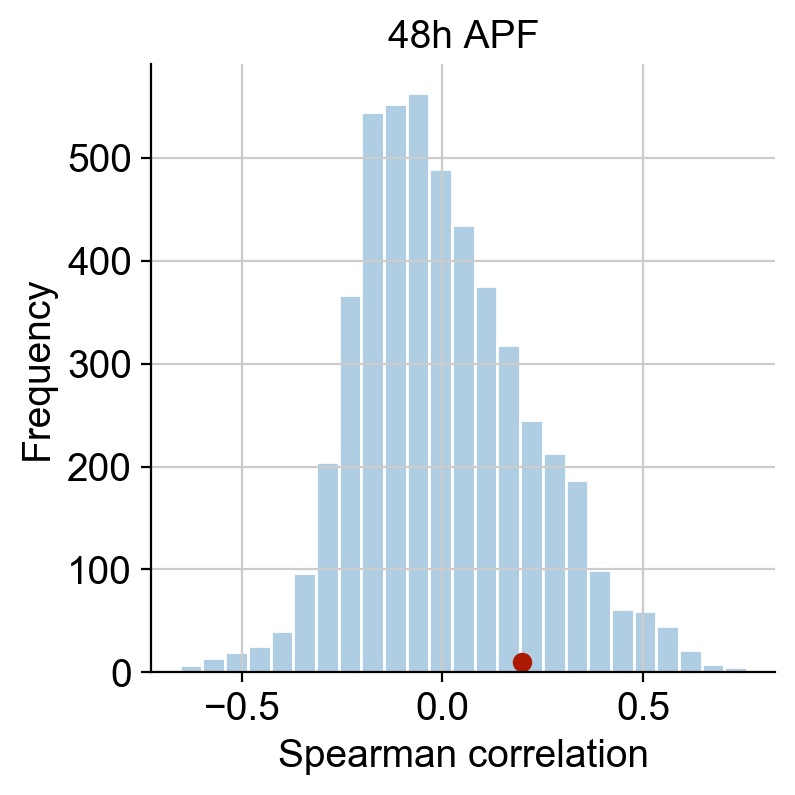

In [56]:
fig, ax = plt.subplots()
ax.scatter(obs_summary['48h']['mean'], 9.8, c='#ab1a00', zorder=2)
ax.hist(correlation_stim_48h, bins=25, color='#afcde3', edgecolor='white', linewidth=1, zorder=1)
ax.set_ylabel('Frequency')
ax.set_xlabel('Spearman correlation')
ax.set_title('48h APF')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plt.savefig('figures/figure_9/permuation/48h_APF.pdf', bbox_inches='tight')

In [57]:
# adult
correlation_stim_adult = np.array([])
total = 8
for i in range (5000):
    curr_num = 8
    curr_corr = np.array([])
    # generate a scrambled birth order and re-order corr-matrix based on that
    order_scrambled = ordered[:]
    random.shuffle(order_scrambled)
    corr_adult_selected = corr_adult[order_scrambled].loc[order_scrambled]
    # iterate through all columns to get all correlations
    for PN_type in corr_adult_selected.index:
        if curr_num > num_types:
            corr_order = pd.Series(np.arange(curr_num-1), index=corr_adult_selected[PN_type][total+1-curr_num:].sort_values(ascending=False).index)
            corr, pvalue = stats.spearmanr(corr_order[order_scrambled][total+1-curr_num:].astype(int),np.arange(curr_num-1))
            curr_corr = np.append(curr_corr,corr)
        elif curr_num < total-num_types+1:
            corr_order = pd.Series(np.arange(total-curr_num), index=corr_adult_selected[PN_type][:total-curr_num].sort_values(ascending=False).index)
            corr, pvalue = stats.spearmanr(corr_order[order_scrambled][:total-curr_num].astype(int),np.arange(total-1-curr_num,-1,-1))
            curr_corr = np.append(curr_corr,corr)
        curr_num = curr_num - 1
    correlation_stim_adult = np.append(correlation_stim_adult,(sum(curr_corr) / len(curr_corr)))

In [58]:
print('observed similarity: :', obs_summary['adult']['mean'])
print('p-value:',
     (obs_summary['adult']['mean'] < correlation_stim_adult).sum() / len(correlation_stim_adult))

observed similarity: : 0.13452380952380952
p-value: 0.2086


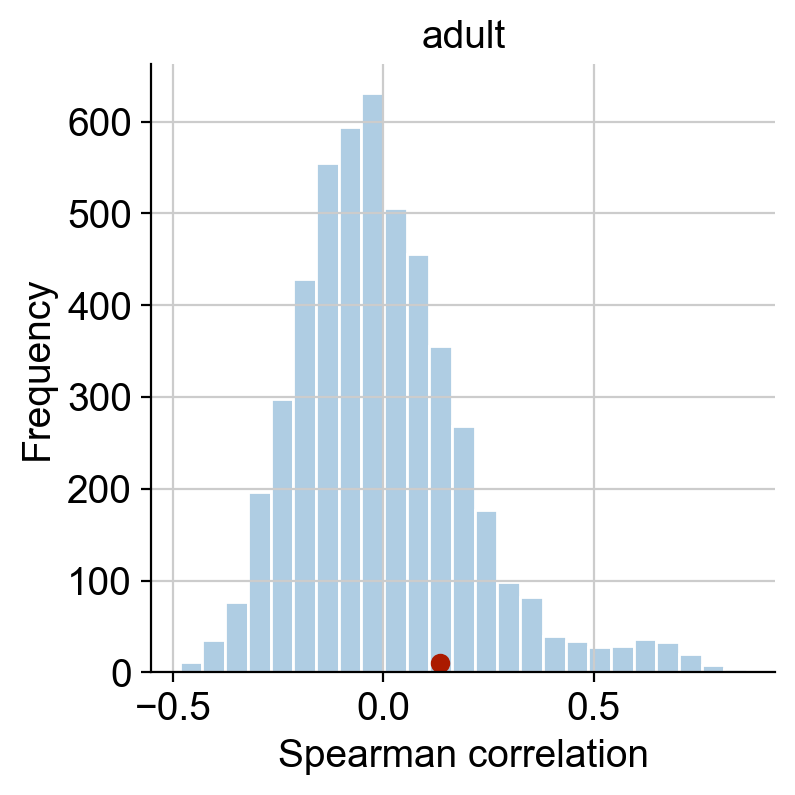

In [59]:
fig, ax = plt.subplots()
ax.scatter(obs_summary['adult']['mean'], 10, c='#ab1a00', zorder=2)
ax.hist(correlation_stim_adult, bins=25, color='#afcde3', edgecolor='white', linewidth=1, zorder=1)
ax.set_ylabel('Frequency')
ax.set_xlabel('Spearman correlation')
ax.set_title('adult')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plt.savefig('figures/figure_9/permuation/adult.pdf', bbox_inches='tight')